<a href="https://colab.research.google.com/github/danadler-dev/pygad_grammatical_evo/blob/main/PyGad_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip3 install pygad

import pygad
import numpy

     |████████████████████████████████| 53 kB 811 kB/s 


In [2]:
"""
Given the following function:
    y = f(w1:w6) = w1x1 + w2x2 + w3x3 + w4x4 + w5x5 + 6wx6
    where (x1,x2,x3,x4,x5,x6)=(4,-2,3.5,5,-11,-4.7) and y=44
What are the best values for the 6 weights (w1 to w6)? We are going to use the genetic algorithm to optimize this function.
"""

function_inputs = [4,-2,3.5,5,-11,-4.7] # Function inputs.
desired_output = 49 # Function output.

def fitness_func(solution, solution_idx):
    output = numpy.sum(solution*function_inputs)
    fitness = 1.0 / (numpy.abs(output - desired_output) + 0.000001)
    return fitness

num_generations = 100 # Number of generations.
num_parents_mating = 10 # Number of solutions to be selected as parents in the mating pool.

sol_per_pop = 20 # Number of solutions in the population.
num_genes = len(function_inputs)
last_fitness = 0

/usr/local/lib/python3.7/dist-packages/pygad/pygad.py:469: UserWarning: The percentage of genes to mutate (mutation_percent_genes=10) resutled in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  if not self.suppress_warnings: warnings.warn("The percentage of genes to mutate (mutation_percent_genes={mutation_percent}) resutled in selecting ({mutation_num}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.".format(mutation_percent=mutation_percent_genes, mutation_num=mutation_num_genes))


Generation = 1
Fitness    = 0.15466033930013084
Change     = 0.15466033930013084
Generation = 2
Fitness    = 0.1646012273383407
Change     = 0.00994088803820986
Generation = 3
Fitness    = 1.3463092302786046
Change     = 1.181708002940264
Generation = 4
Fitness    = 1.3463092302786046
Change     = 0.0
Generation = 5
Fitness    = 1.3463092302786046
Change     = 0.0
Generation = 6
Fitness    = 2.072332771158985
Change     = 0.7260235408803803
Generation = 7
Fitness    = 2.072332771158985
Change     = 0.0
Generation = 8
Fitness    = 5.148697228092004
Change     = 3.0763644569330193
Generation = 9
Fitness    = 5.148697228092004
Change     = 0.0
Generation = 10
Fitness    = 5.148697228092004
Change     = 0.0
Generation = 11
Fitness    = 5.148697228092004
Change     = 0.0
Generation = 12
Fitness    = 5.148697228092004
Change     = 0.0
Generation = 13
Fitness    = 5.148697228092004
Change     = 0.0
Generation = 14
Fitness    = 29.326979836452203
Change     = 24.1782826083602
Generation = 15
F

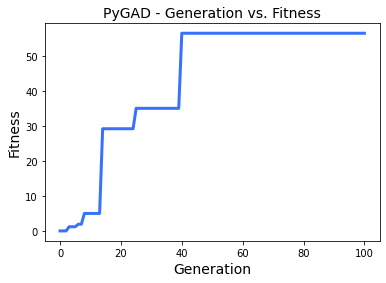

Parameters of the best solution : [-3.62626686  1.09688717 -0.19805558  3.71577447 -3.99507749 -0.81907271]
Fitness value of the best solution = 56.590388918638126
Index of the best solution : 0
Predicted output based on the best solution : 48.98233015484222
Best fitness value reached after 40 generations.


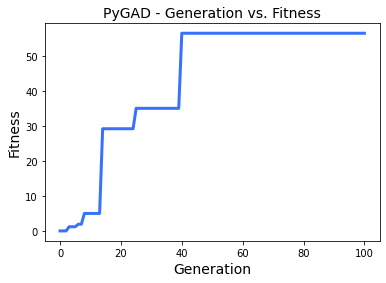

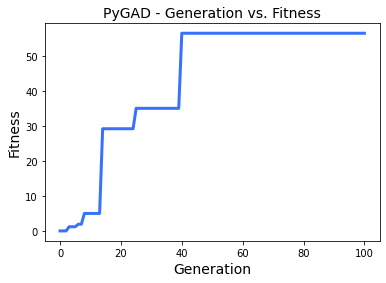

In [3]:

def on_generation(ga_instance):
    global last_fitness
    print("Generation = {generation}".format(generation=ga_instance.generations_completed))
    print("Fitness    = {fitness}".format(fitness=ga_instance.best_solution(pop_fitness=ga_instance.last_generation_fitness)[1]))
    print("Change     = {change}".format(change=ga_instance.best_solution(pop_fitness=ga_instance.last_generation_fitness)[1] - last_fitness))
    last_fitness = ga_instance.best_solution(pop_fitness=ga_instance.last_generation_fitness)[1]

ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       sol_per_pop=sol_per_pop,
                       num_genes=num_genes,
                       fitness_func=fitness_func,
                       on_generation=on_generation)

# Running the GA to optimize the parameters of the function.
ga_instance.run()

ga_instance.plot_fitness()

# Returning the details of the best solution.
solution, solution_fitness, solution_idx = ga_instance.best_solution(ga_instance.last_generation_fitness)
print("Parameters of the best solution : {solution}".format(solution=solution))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))
print("Index of the best solution : {solution_idx}".format(solution_idx=solution_idx))

prediction = numpy.sum(numpy.array(function_inputs)*solution)
print("Predicted output based on the best solution : {prediction}".format(prediction=prediction))

if ga_instance.best_solution_generation != -1:
    print("Best fitness value reached after {best_solution_generation} generations.".format(best_solution_generation=ga_instance.best_solution_generation))

# Saving the GA instance.
filename = 'genetic' # The filename to which the instance is saved. The name is without extension.
ga_instance.save(filename=filename)

# Loading the saved GA instance.
loaded_ga_instance = pygad.load(filename=filename)
loaded_ga_instance.plot_fitness()